In [2]:
import pandas as pd
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

```
자동차 판매량 영향인자 분석 

특정 기간 일자별 자동차 판매량 데이터로, 프로모션 종류와 seller 정보 외의 다른 정보는 동일한 상황의 판매량 기록이다. 

car_sales.csv(구분자: comma(“,”), 22 Rows, 5 Columns)
```

In [3]:
df= pd.read_csv('data/car_sales.csv')
df.head()

PromoA  PromoB  PromoC    sellerA    sellerB
0    21.6    22.0    22.2  17.068996  23.056418
1    23.4    22.8    23.0  19.731236  28.208923
2    20.8    22.4    22.0  19.448667  23.443884
3    22.2    22.0    21.6  17.416952  25.349077
4    23.6    23.4    22.8  21.777665  26.191757

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PromoA   22 non-null     float64
 1   PromoB   22 non-null     float64
 2   PromoC   22 non-null     float64
 3   sellerA  22 non-null     float64
 4   sellerB  22 non-null     float64
dtypes: float64(5)
memory usage: 1008.0 bytes


## Q 1

```
프로모션A, 프로모션B, 프로모션C를 각각 적용하였을 때의 
판매량인 PromoA, PromoB, PromoC 와 sellerA,sellerB의 판매량인 sellerA, sellerB에 대해 
정규성 검정을 수행한 후, 유의수준 5%에서 정규성 기각여부(기각이면 Y, 그렇지 않으면 N)를 기술하시오. 

Note. Kolmogorov-Smirnov test로 정규성 검정을 수행한다.
(답안예시) NNNNN
```

In [4]:
# 스케일 변환
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 코드입력
df_scaled = scaler.fit_transform(df) # 코드입력

In [5]:
df_scaled

array([[-0.53917097, -0.13433075,  0.34104674, -1.32080866, -0.71354006],
       [ 1.15536637,  0.65374299,  1.09134958,  0.30236084,  1.75918303],
       [-1.29229868,  0.25970612,  0.15347103,  0.13007828, -0.52759245],
       [ 0.02567481, -0.13433075, -0.22168038, -1.10865987,  0.38672308],
       [ 1.3436483 ,  1.2447983 ,  0.90377387,  1.55007017,  0.79113074],
       [-0.35088905,  0.06268768,  0.52862245, -1.66351327, -0.71290003],
       [-0.53917097, -0.52836763, -0.40925609, -0.22731027, -1.24669755],
       [-0.35088905, -0.13433075, -0.40925609,  0.65359368,  0.44887483],
       [-1.10401676, -1.51345981, -1.72228606, -0.66414628, -0.11020161],
       [ 1.15536637,  1.04777987,  0.90377387,  0.87451473, -0.23164569],
       [-1.10401676, -1.31644137, -1.34713464,  1.05206853, -0.28733696],
       [ 0.40223866,  0.06268768, -0.03410467, -0.51387331,  0.94746095],
       [ 0.21395674, -0.72538606, -0.03410467, -0.00516054,  0.25275692],
       [-1.85714447, -2.10451512, -1.9

In [6]:
type(df_scaled)

numpy.ndarray

In [9]:
PromoA_test = df_scaled[:, 0]
PromoA_test

array([-0.53917097,  1.15536637, -1.29229868,  0.02567481,  1.3436483 ,
       -0.35088905, -0.53917097, -0.35088905, -1.10401676,  1.15536637,
       -1.10401676,  0.40223866,  0.21395674, -1.85714447, -0.16260712,
       -0.35088905,  0.02567481, -0.35088905, -0.16260712,  0.40223866,
        0.59052059,  2.84990372])

In [11]:
PromoA = df_scaled[:, 0]
PromoB = df_scaled[:, 1]
PromoC = df_scaled[:, 2]
sellerA = df_scaled[:, 3]
sellerB = df_scaled[:, 4]

In [12]:
print(stats.kstest(PromoA, 'norm'))

KstestResult(statistic=0.12612199501245602, pvalue=0.832786341040276)


In [13]:
# PromoA에 대한 Normality Test
print(stats.kstest(PromoA, 'norm'))

# PromoB에 대한 Normality Test
print(stats.kstest(PromoB, 'norm'))

# PromoC에 대한 Normality Test
print(stats.kstest(PromoC, 'norm'))

# sellerA에 대한 Normality Test
print(stats.kstest(sellerA, 'norm'))


# sellerB에 대한 Normality Test
print(stats.kstest(sellerB, 'norm'))

KstestResult(statistic=0.12612199501245602, pvalue=0.832786341040276)
KstestResult(statistic=0.17384324571417104, pvalue=0.46749577505509454)
KstestResult(statistic=0.1593576850249862, pvalue=0.5769681315718505)
KstestResult(statistic=0.07147221947198973, pvalue=0.9994135371523151)
KstestResult(statistic=0.10506484235138402, pvalue=0.9474571677047313)


p-value가 모두 0.05보다 크다

즉, H1을 기각하고, Normality (정규분포)를 따른다가 채택

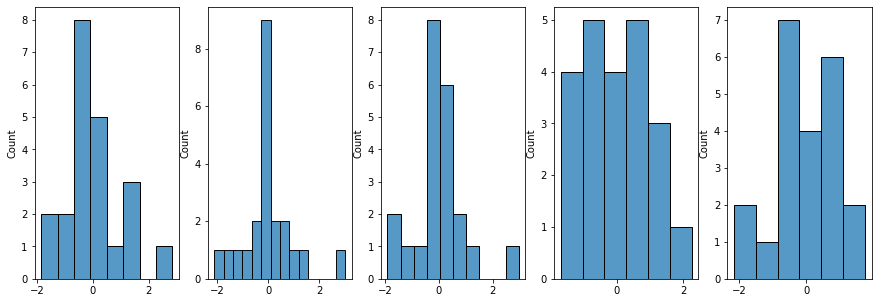

In [14]:
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(15, 5)
sns.histplot(PromoA, ax=axes[0])
sns.histplot(PromoB, ax=axes[1])
sns.histplot(PromoC, ax=axes[2])
sns.histplot(sellerA, ax=axes[3])
sns.histplot(sellerB, ax=axes[4])
plt.show()

**정답: YYYYY**

## Q 2

```
sellerA, sellerB의 판매량인 sellerA, sellerB가 차이가 있는지 일자별 짝을 지어 검정하고자 한다. 

이전 문제의 정규성 검정의 결과를 토대로, 정규성을 띈다면 모수적 방법으로, 
그렇지 않다면 비모수적 방법으로 가설검정을 수행한 후, 
유의수준 5%에서 귀무가설 기각여부(기각이면 Y, 그렇지 않으면 N)를 기술하시오. 

(답안예시) N
```

2개의 샘플이 정규성을 띄는 경우 모수적 방법(parameteric method)으로 검증한다.

[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

H1: 2 related or repeated samples have different average (expected) values.

In [15]:
# 정규성을 띄므로 모수적 방법(parameteric method)으로 검증
sp.stats.ttest_rel(sellerA, sellerB)

Ttest_relResult(statistic=7.921627679478326e-15, pvalue=0.9999999999999938)

pvalue가 0.05보다 크므로 H1를 기각한다.

sellerA와 sellerB의 차이는 없다가 채택

**정답: Y**